# Data Pipeline

model1_path = './models/exp_reward/r_sac/data/train/episode.csv'
model2_path = './models/exp_reward/rd1_sac/data/train/episode.csv'
model2_path = './models/exp_reward/rd2_sac/data/train/episode.csv'
model2_path = './models/exp_reward/rd3_sac/data/train/episode.csv'

## Accumulative Reward

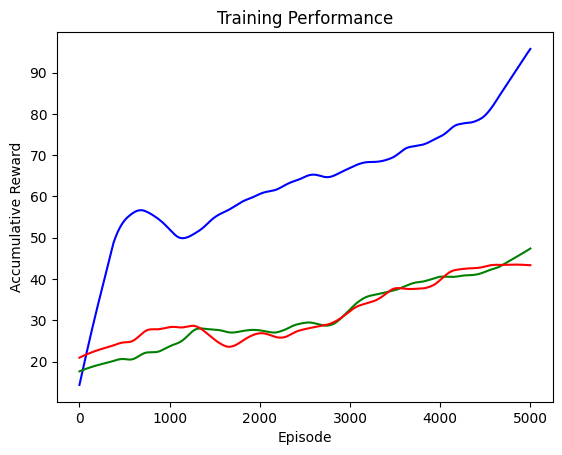

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Specify the path to your CSV file


model1_path = 'experiments/grl5/36sac/data/train/episode.csv'
model2_path = 'experiments/grl5/36gcn_sac/data/train/episode.csv'
model3_path = 'experiments/grl5/36gcn_sacb/data/train/episode.csv'
# model4_path = 'experiments/grl3/sage_sac/data/train/episode.csv'

df_1 = pd.read_csv(model1_path)
df_2 = pd.read_csv(model2_path)
df_3 = pd.read_csv(model3_path)
# df_4 = pd.read_csv(model4_path)

window_size = 100  # Change this based on your needs
df_1['Accumulative Reward (Avg)'] = df_1['Accumulative Reward'].rolling(window=window_size).mean()
df_2['Accumulative Reward (Avg)'] = df_2['Accumulative Reward'].rolling(window=window_size).mean()
df_3['Accumulative Reward (Avg)'] = df_3['Accumulative Reward'].rolling(window=window_size).mean()
# df_4['Accumulative Reward (Avg)'] = df_4['Accumulative Reward'].rolling(window=window_size).mean()


frac = 0.15
lowess = sm.nonparametric.lowess
df_1s = lowess(df_1['Accumulative Reward'], df_1['Episode'], frac=frac)
df_2s = lowess(df_2['Accumulative Reward'], df_2['Episode'], frac=frac)
df_3s = lowess(df_3['Accumulative Reward'], df_3['Episode'], frac=frac)
# df_4s = lowess(df_4['Accumulative Reward'], df_4['Episode'], frac=frac)

# Add the smoothed data to the original DataFrames
df_1['Accumulative Reward (LOESS)'] = df_1s[:, 1]
df_2['Accumulative Reward (LOESS)'] = df_2s[:, 1]
df_3['Accumulative Reward (LOESS)'] = df_3s[:, 1]
# df_4['Accumulative Reward (LOESS)'] = df_4s[:, 1]

plt.plot(df_1['Episode'], df_1['Accumulative Reward (LOESS)'], color="blue")
plt.plot(df_2['Episode'], df_2['Accumulative Reward (LOESS)'], color="green")
plt.plot(df_3['Episode'], df_3['Accumulative Reward (LOESS)'], color="red")
# plt.plot(df_4['Episode'], df_4['Accumulative Reward (LOESS)'], color="yellow")

# Customize the plot
plt.title('Training Performance')
plt.xlabel('Episode')
plt.ylabel('Accumulative Reward')

# Show the plot
plt.show()

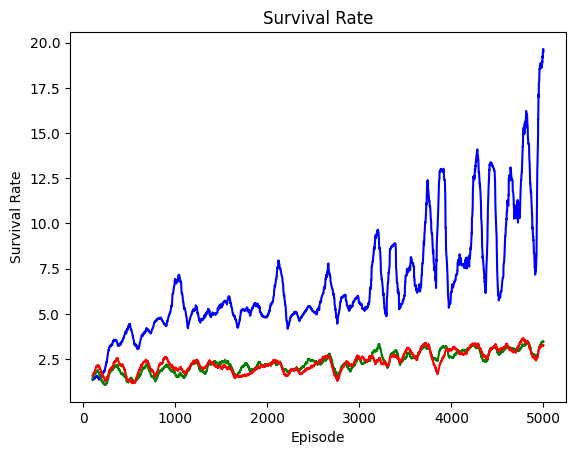

In [5]:


df_1['Survival Rate'] = df_1['Length'] / 2016 * 100
df_2['Survival Rate'] = df_2['Length'] / 2016 * 100
df_3['Survival Rate'] = df_3['Length'] / 2016 * 100
# df_4['Survival Rate'] = df_4['Length'] / 2016 * 100


df_1['Survival Rate (Avg)'] = df_1['Survival Rate'].rolling(window=window_size).mean()
df_2['Survival Rate (Avg)'] = df_2['Survival Rate'].rolling(window=window_size).mean()
df_3['Survival Rate (Avg)'] = df_3['Survival Rate'].rolling(window=window_size).mean()
# df_4['Survival Rate (Avg)'] = df_4['Survival Rate'].rolling(window=window_size).mean()

frac = 0.15
lowess = sm.nonparametric.lowess
df_1s = lowess(df_1['Survival Rate'], df_1['Episode'], frac=frac)
df_2s = lowess(df_2['Survival Rate'], df_2['Episode'], frac=frac)
df_3s = lowess(df_3['Survival Rate'], df_3['Episode'], frac=frac)
# df_4s = lowess(df_4['Accumulative Reward'], df_4['Episode'], frac=frac)

# Add the smoothed data to the original DataFrames
df_1['Survival Rate (LOESS)'] = df_1s[:, 1]
df_2['Survival Rate (LOESS)'] = df_2s[:, 1]
df_3['Survival Rate (LOESS)'] = df_3s[:, 1]
# df_4['Accumulative Reward (LOESS)'] = df_4s[:, 1]

plt.plot(df_1['Episode'], df_1['Survival Rate (Avg)'], color="blue")
plt.plot(df_2['Episode'], df_2['Survival Rate (Avg)'], color="green")
plt.plot(df_3['Episode'], df_3['Survival Rate (Avg)'], color="red")
# plt.plot(df_4['Episode'], df_4['Survival Rate (LOESS)'], color="yellow")



# Customize the plot
plt.title('Survival Rate')
plt.xlabel('Episode')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

In [25]:

df_1['Avg Cost (Avg)'] = df_1['Avg Cost'].rolling(window=window_size).mean()
df_2['Avg Cost (Avg)'] = df_2['Avg Cost'].rolling(window=window_size).mean()
df_3['Avg Cost (Avg)'] = df_3['Avg Cost'].rolling(window=window_size).mean()
# df_4['Avg Cost (Avg)'] = df_4['Avg Cost'].rolling(window=window_size).mean()

frac = 0.15
lowess = sm.nonparametric.lowess
window_size = 125  # Change this based on your needs
df_1s = lowess(df_1['Avg Cost'], df_1['Episode'], frac=frac)
df_2s = lowess(df_2['Avg Cost'], df_2['Episode'], frac=frac)
df_3s = lowess(df_3['Avg Cost'], df_3['Episode'], frac=frac)
# df_4s = lowess(df_4['Accumulative Reward'], df_4['Episode'], frac=frac)

# Add the smoothed data to the original DataFrames
df_1['Avg Cost (LOESS)'] = df_1s[:, 1]
df_2['Avg Cost (LOESS)'] = df_2s[:, 1]
df_3['Avg Cost (LOESS)'] = df_3s[:, 1]
# df_4['Accumulative Reward (LOESS)'] = df_4s[:, 1]



plt.plot(df_1['Episode'], df_1['Avg Cost (LOESS)'], color="blue")
plt.plot(df_2['Episode'], df_2['Avg Cost (LOESS)'], color="green")
plt.plot(df_3['Episode'], df_3['Avg Cost (LOESS)'], color="red")
# plt.plot(df_4['Episode'], df_4['Avg Cost (LOESS)'], color="yellow")

# Customize the plot
plt.title('Daily Operating Cost')
plt.xlabel('Episode')
plt.ylabel('Avg Cost')

# Show the plot
plt.show()

In [5]:

df_1['Avg Renewables Wasted (Avg)'] = df_1['Avg Renewables Wasted'].rolling(window=window_size).mean()
df_2['Avg Renewables Wasted (Avg)'] = df_2['Avg Renewables Wasted'].rolling(window=window_size).mean()
df_3['Avg Renewables Wasted (Avg)'] = df_3['Avg Renewables Wasted'].rolling(window=window_size).mean()
# df_4['Avg Renewables Wasted (Avg)'] = df_4['Avg Renewables Wasted'].rolling(window=window_size).mean()

frac = 0.15
lowess = sm.nonparametric.lowess
window_size = 125  # Change this based on your needs
df_1s = lowess(df_1['Avg Renewables Wasted'], df_1['Episode'], frac=frac)
df_2s = lowess(df_2['Avg Renewables Wasted'], df_2['Episode'], frac=frac)
df_3s = lowess(df_3['Avg Renewables Wasted'], df_3['Episode'], frac=frac)
# df_4s = lowess(df_4['Avg Renewables Wasted'], df_4['Episode'], frac=frac)

# Add the smoothed data to the original DataFrames
df_1['Avg Renewables Wasted (LOESS)'] = df_1s[:, 1]
df_2['Avg Renewables Wasted (LOESS)'] = df_2s[:, 1]
df_3['Avg Renewables Wasted (LOESS)'] = df_3s[:, 1]
# df_4['Avg Renewables Wasted (LOESS)'] = df_4s[:, 1]

plt.plot(df_1['Episode'], df_1['Avg Renewables Wasted (LOESS)'], color="blue")
plt.plot(df_2['Episode'], df_2['Avg Renewables Wasted (LOESS)'], color="green")
plt.plot(df_3['Episode'], df_3['Avg Renewables Wasted (LOESS)'], color="red")
# plt.plot(df_4['Episode'], df_4['Avg Renewables Wasted (LOESS)'], color="yellow")

# Customize the plot
plt.title('Avg RES Wasted')
plt.xlabel('Episode')
plt.ylabel('Avg RES Wasted')

# Show the plot
plt.show()